<a href="https://colab.research.google.com/github/DiegoBrehme/Proyecto_Regresion_Simbolica_PHY_SO_google_colab/blob/main/PHYSO_Nusselt_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba datos reales: Número Nusselt




 - La expresión resultante depende tanto del número de Reynolds (Re), el número de Prandtl (Pr) y el factor de separación de celda (S).
 -  Se usa config2: SR ; Class SR (sin Dimensional Analisis). Que es perfecto para este caso, ya que S no tiene dimensiones físicas por ejemplo.

In [1]:
!pip -q install physo numpy pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 15.8 MB/s eta 0:00:00


In [2]:
# ============================================
# 🔹 INSTALACIÓN Y LIBRERÍAS
# ============================================

!pip -q install physo numpy pandas matplotlib scikit-learn sympy


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

# === Internal code import (como en sr_quick_start) ===
import physo
import physo.learn.monitoring as monitoring

# utilidades de Pareto y sympy (como en el quick start)
from physo.benchmark.utils import symbolic_utils as su
import sympy

seed = 0
np.random.seed(seed)
torch.manual_seed(seed)


/usr/local/lib/python3.12/dist-packages/physo/physym/program.py:49: UserWarning: Latex display is not available. Issues: shutil.which('latex') returned None
  warnings.warn(msg)


Enforcing spawn multiprocessing start method.
Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
Parallel mode is not available because having a CUDA-able version of pytorch was found to cause issues on some systems (even if the dataset is sent to the proper device). Please install the vanilla non CUDA-able version of pytorch via conda install pytorch (returning torch.cuda.is_available() = False) to use parallel mode.
Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
Parallel mode is not available because having a CUDA-able version of pytorch was found to cause issues on some systems (even if the dataset is sent to the proper device). Please install the van

/usr/local/lib/python3.12/dist-packages/physo/physym/program.py:49: UserWarning: Latex display is not available. Issues: shutil.which('latex') returned None
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/physo/physym/batch_execute.py:80: UserWarning: Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/physo/physym/batch_execute.py:90: UserWarning: Parallel mode is not available because having a CUDA-able version of pytorch was found to cause issues on some systems (even if the dataset is sent to the proper device). Please install the vanilla non CUDA-able version of pytorch via conda install pytorch (returning torch.cuda.is_available() = False) to use parallel mode.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/physo/physym/reward.py:

In [3]:
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

In [4]:
# ============================================
# 🔹 CARGA DE DATOS
# ============================================
df25 = pd.read_csv("/content/df_n_25.txt")
df74 = pd.read_csv("/content/df_n_74.txt")
df102 = pd.read_csv("/content/df_n_102.txt")
df53 = pd.read_csv("/content/df_n_53.txt")

# Conjuntos según la tesis de RAFAEL IGNACIO DE LA SOTTA VARGAS:
# Entrenamiento: 25 y 74
# Validación: 102
# Prueba: 53
df_train = pd.concat([df25, df74], ignore_index=True)
df_val   = df102
df_test  = df53

# Variables
def to_physo_arrays(df):
    X_df = df[['Rem', 'prandtl', 'K']]
    y    = df['nusselt'].to_numpy().astype(float)        # (N,)
    X    = X_df.to_numpy().T.astype(float)               # (n_dim, N)
    X_names = ["Re", "Pr", "K"]
    return X, y, X_names

X_tr, y_tr, X_names = to_physo_arrays(df_train)
X_val, y_val, _ = to_physo_arrays(df_val)
X_te,  y_te,  _ = to_physo_arrays(df_test)

Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
Parallel mode is not available because having a CUDA-able version of pytorch was found to cause issues on some systems (even if the dataset is sent to the proper device). Please install the vanilla non CUDA-able version of pytorch via conda install pytorch (returning torch.cuda.is_available() = False) to use parallel mode.
SR task started...


/usr/local/lib/python3.12/dist-packages/physo/physym/batch_execute.py:80: UserWarning: Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/physo/physym/batch_execute.py:90: UserWarning: Parallel mode is not available because having a CUDA-able version of pytorch was found to cause issues on some systems (even if the dataset is sent to the proper device). Please install the vanilla non CUDA-able version of pytorch via conda install pytorch (returning torch.cuda.is_available() = False) to use parallel mode.
  warnings.warn(msg)


=========== Epoch 00000 ===========
-> Time 4.30 s
-> Memory Usage: 1309.76 MB

Overall best  at R=0.818131
-> Raw expression : 
       0.5        
- - -Re   ⋅c₀ + c₂

Best of epoch at R=0.818131
-> Raw expression : 
       0.5        
- - -Re   ⋅c₀ + c₂


=========== Epoch 00001 ===========
-> Time 260.30 s
-> Memory Usage: 1559.43 MB

Overall best  at R=0.820161
-> Raw expression : 
  0.5 ⎛   ⎛  2⎞          ⎞
Re   ⋅⎝log⎝Re ⎠ + log(c₁)⎠
──────────────────────────
            c₁            

Best of epoch at R=0.820161
-> Raw expression : 
  0.5 ⎛   ⎛  2⎞          ⎞
Re   ⋅⎝log⎝Re ⎠ + log(c₁)⎠
──────────────────────────
            c₁            


=========== Epoch 00002 ===========
-> Time 247.75 s
-> Memory Usage: 1597.76 MB

Overall best  at R=0.820161
-> Raw expression : 
  0.5 ⎛   ⎛  2⎞          ⎞
Re   ⋅⎝log⎝Re ⎠ + log(c₁)⎠
──────────────────────────
            c₁            

Best of epoch at R=0.818131
-> Raw expression : 
         0.5
     ⎛Re⎞   
c₃ + ⎜──⎟   
     ⎝c₀⎠   


=

FileNotFoundError: [Errno 2] No such file or directory: 'physo_curves_pareto.pkl'

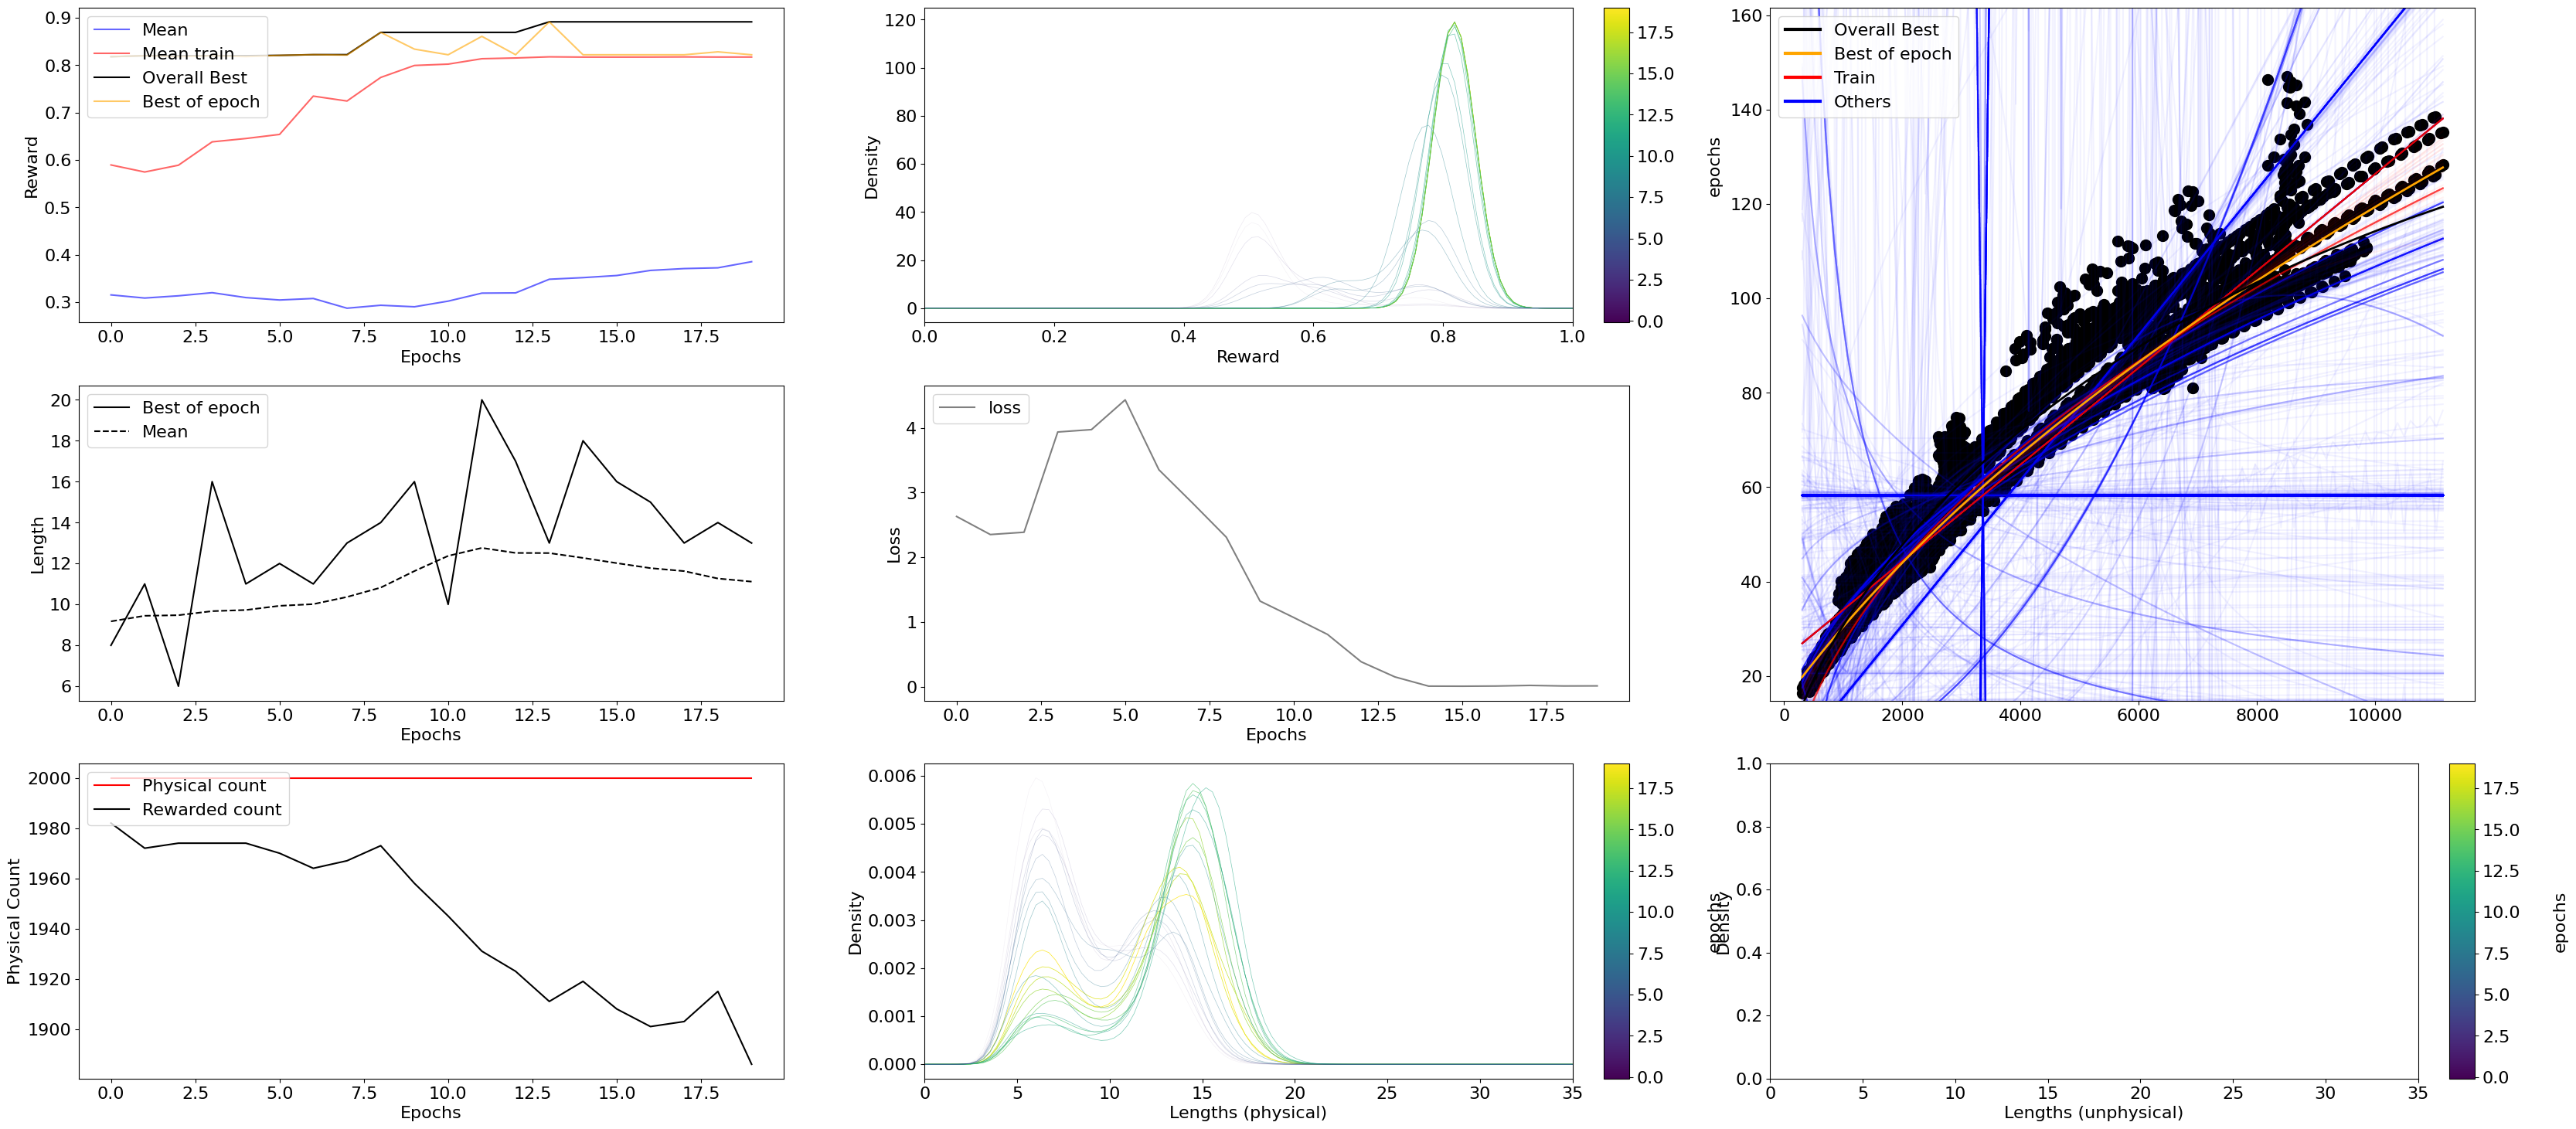

In [5]:
# ============================================
# 🔹 ENTRENAMIENTO CON PHYSO (config2)
# ============================================

zero_u  = [0, 0, 0]
X_units = [zero_u for _ in X_names]
y_units = zero_u
y_name  = "Nu"

fixed_consts       = [1.0]
fixed_consts_units = [zero_u]
free_consts_names  = ["c0", "c1", "c2", "c3"]
free_consts_units  = [zero_u]*len(free_consts_names)

op_names = ["mul", "add", "sub", "div", "inv", "n2", "sqrt", "neg", "exp", "log", "sin", "cos"]

# --- 4. Ejecutar regresión simbólica con CONFIG2 ---
expression, logs = physo.SR(
    X_tr, y_tr,
    X_names = X_names,
    X_units = X_units,
    y_name  = y_name,
    y_units = y_units,
    fixed_consts       = fixed_consts,
    fixed_consts_units = fixed_consts_units,
    free_consts_names  = free_consts_names,
    free_consts_units  = free_consts_units,
    op_names = op_names,
    run_config = physo.config.config2.config2,
    parallel_mode = False,
    epochs = 20,
)



#  Mejor expresión
best_expr = expression


print("✅ Ecuación simbólica (infix):")
print(best_expr.get_infix_pretty())
print("\nLatex evaluado:")
print(sympy.latex(best_expr.get_infix_sympy(evaluate_consts=True)))

In [7]:
# Usa el resultado ya entrenado que quedó en memoria
assert 'expression' in globals(), "La variable 'expression' no existe en memoria."
best_expr = expression  # <- esta es tu mejor ecuación

# Muestra y sigue con tu flujo normal
import sympy
print("✅ Ecuación simbólica (infix):")
print(best_expr.get_infix_pretty())

print("\nLaTeX evaluado:")
print(sympy.latex(best_expr.get_infix_sympy(evaluate_consts=True)))


✅ Ecuación simbólica (infix):
  0.5                       
Re   ⋅(-K - c₀⋅log(Re) + c₀)
────────────────────────────
             c₁             

LaTeX evaluado:
\mathtt{\text{[0.242805595674933*Re**0.5*(-K + 0.740526244337971*log(Re) - 0.740526244337971)]}}


Validación (102 celdas): RMSE=2.8547 | NRMSE=2.05% | R²=0.9826


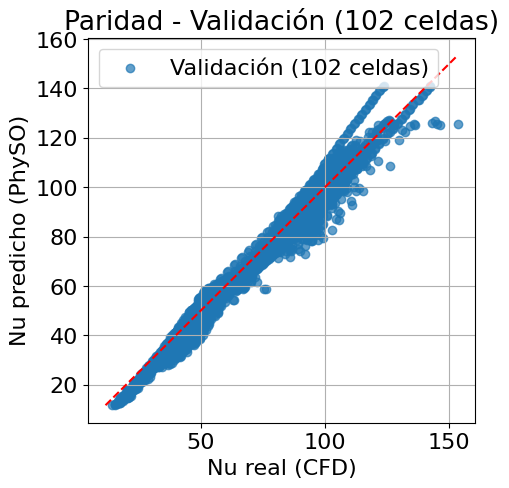

Prueba (53 celdas): RMSE=2.6530 | NRMSE=1.98% | R²=0.9855


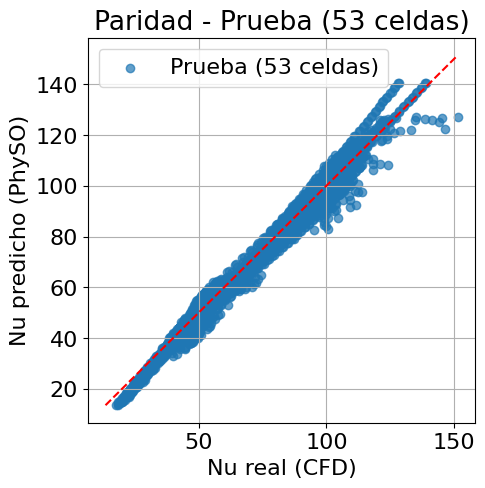

In [8]:
# ============================================
# 🔹 GRÁFICO PARIDAD (Nu real vs Nu predicho)
# ============================================
# ============================================
# 🔹 MÉTRICAS DE DESEMPEÑO (RMSE, NRMSE, R²)
# ============================================

from sklearn.metrics import mean_squared_error, r2_score


# === Métricas y paridad ===
sym_expr = best_expr.get_infix_sympy(evaluate_consts=True)[0]
vars_syms = [sympy.Symbol(n) for n in X_names]
f_lam = sympy.lambdify(vars_syms, sym_expr, "numpy")

def eval_split(X, y, split_name):
    y_pred = f_lam(*[X[i, :] for i in range(X.shape[0])])
    rmse  = np.sqrt(mean_squared_error(y, y_pred))
    nrmse = rmse / (np.ptp(y) + 1e-12)
    r2    = r2_score(y, y_pred)
    print(f"{split_name}: RMSE={rmse:.4f} | NRMSE={nrmse*100:.2f}% | R²={r2:.4f}")
    plt.figure(figsize=(5,5))
    plt.scatter(y, y_pred, alpha=0.7, label=split_name)
    lo, hi = min(y.min(), y_pred.min()), max(y.max(), y_pred.max())
    plt.plot([lo, hi], [lo, hi], 'r--')
    plt.xlabel("Nu real (CFD)"); plt.ylabel("Nu predicho (PhySO)")
    plt.title(f"Paridad - {split_name}")
    plt.legend(); plt.grid(True); plt.show()
    return y_pred

_ = eval_split(X_val, y_val, "Validación (102 celdas)")
_ = eval_split(X_te,  y_te,  "Prueba (53 celdas)")


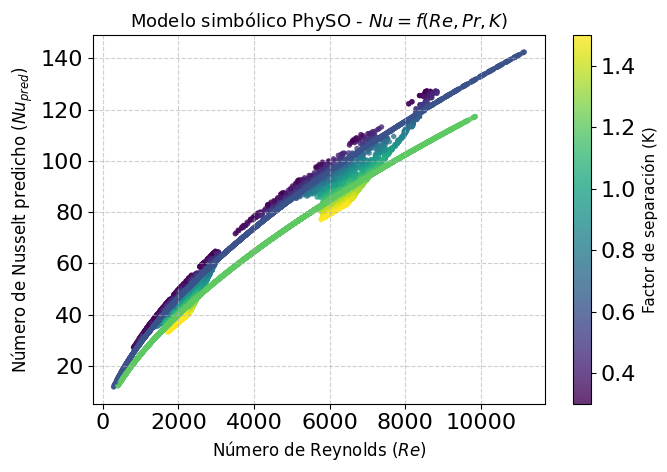

In [14]:
# ============================================
# 🔹 GRÁFICO Nu_pred vs Re (solo modelo PhySO)
#    con gradiente continuo por K
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib as mpl

# 1. Unir datos (train+val+test)
df_all = pd.concat([df_train, df_val, df_test], ignore_index=True)
X_all, y_all, _ = to_physo_arrays(df_all)
y_all_pred = f_lam(*[X_all[i, :] for i in range(X_all.shape[0])])

Re_vals = df_all['Rem'].values
K_vals  = df_all['K'].values

# 2. Normalizador y colormap (gradiente continuo por K)
norm = Normalize(vmin=K_vals.min(), vmax=K_vals.max())
cmap = mpl.cm.viridis

# 3. Graficar solo predicción con gradiente
plt.figure(figsize=(7,5))
sc = plt.scatter(Re_vals, y_all_pred, c=K_vals, cmap=cmap, norm=norm,
                 s=15, alpha=0.8, linewidths=0)

# 4. Barra de color (factor de separación)
cbar = plt.colorbar(sc)
cbar.set_label("Factor de separación (K)", fontsize=11)

plt.xlabel(r"Número de Reynolds ($Re$)", fontsize=12)
plt.ylabel(r"Número de Nusselt predicho ($Nu_{pred}$)", fontsize=12)
plt.title(r"Modelo simbólico PhySO - $Nu = f(Re, Pr, K)$", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
